In [2]:
import pandas as pd

# Load the combined CSV
df = pd.read_csv("C:/Users/gayat/stackoverflow_nlp_combined.csv")

# Preview the data
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()


Shape: (16005, 4)
Columns: ['question_id', 'title', 'body', 'tags']


,question_id,title,body,tags
0,79564180,Natural language processing - Tamil,<p>I'm building a voice-based system where the...,"machine-learning,nlp,neural-network,artificial..."
1,79559702,NameError: name &#39;init_empty_weights&#39; i...,<p>I am trying to set up hugging face locally ...,"nlp,huggingface-transformers,huggingface"
2,79557354,Sentencepiece not generating models after prep...,<p>So this is the log that I see on the termin...,"python,nlp,sentencepiece"
3,79557315,How should I approach the word synonyms for re...,<p>I have created an aspect based list for ana...,"python,nlp,data-science,sentiment-analysis"
4,79557313,No attention output in jinaai/jina-embeddings-...,<p>When I use this model like so -</p>\n<pre><...,"machine-learning,nlp,artificial-intelligence,s..."


In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources (only first time)
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# Combine title and body
df["combined_text"] = df["title"].fillna("") + " " + df["body"].fillna("")

# Define cleaning function
def clean_text(text):
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # Remove punctuation
    tokens = text.lower().split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Apply cleaning
df["cleaned_text"] = df["combined_text"].apply(clean_text)

# Preview cleaned data
df[["title", "body", "cleaned_text"]].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gayat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gayat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,title,body,cleaned_text
0,Natural language processing - Tamil,<p>I'm building a voice-based system where the...,natural language processing tamil pim building...
1,NameError: name &#39;init_empty_weights&#39; i...,<p>I am trying to set up hugging face locally ...,nameerror name 39initemptyweights39 defined us...
2,Sentencepiece not generating models after prep...,<p>So this is the log that I see on the termin...,sentencepiece generating model preprocessing s...
3,How should I approach the word synonyms for re...,<p>I have created an aspect based list for ana...,approach word synonym review aspect matching p...
4,No attention output in jinaai/jina-embeddings-...,<p>When I use this model like so -</p>\n<pre><...,attention output jinaaijinaembeddingsv3 embedd...


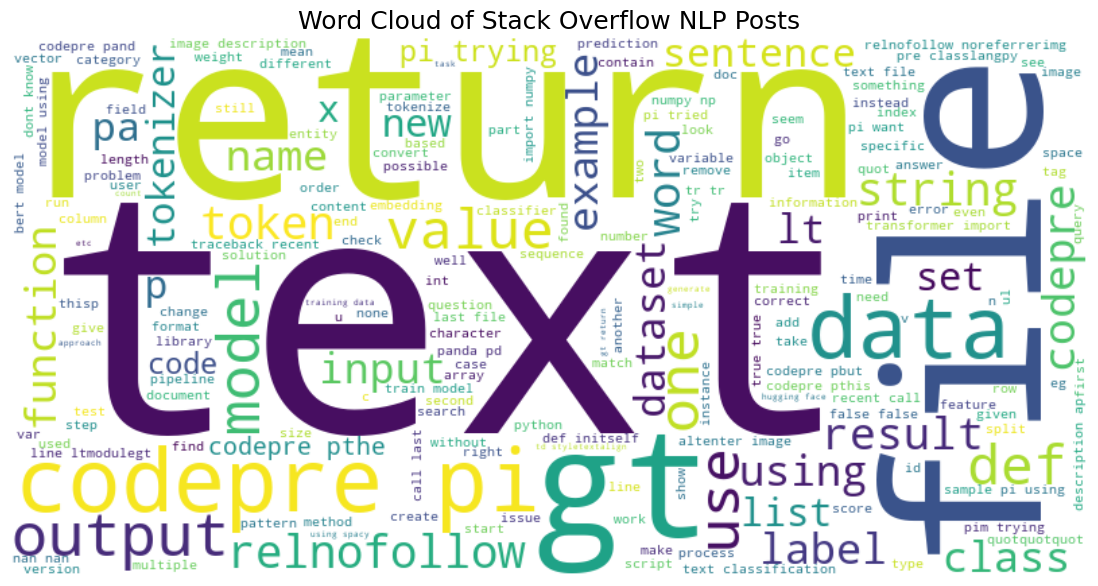

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all cleaned text into one large string
all_text = " ".join(df["cleaned_text"])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

# Display it
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Stack Overflow NLP Posts", fontsize=18)
plt.savefig("wordcloud.png") 
plt.show()


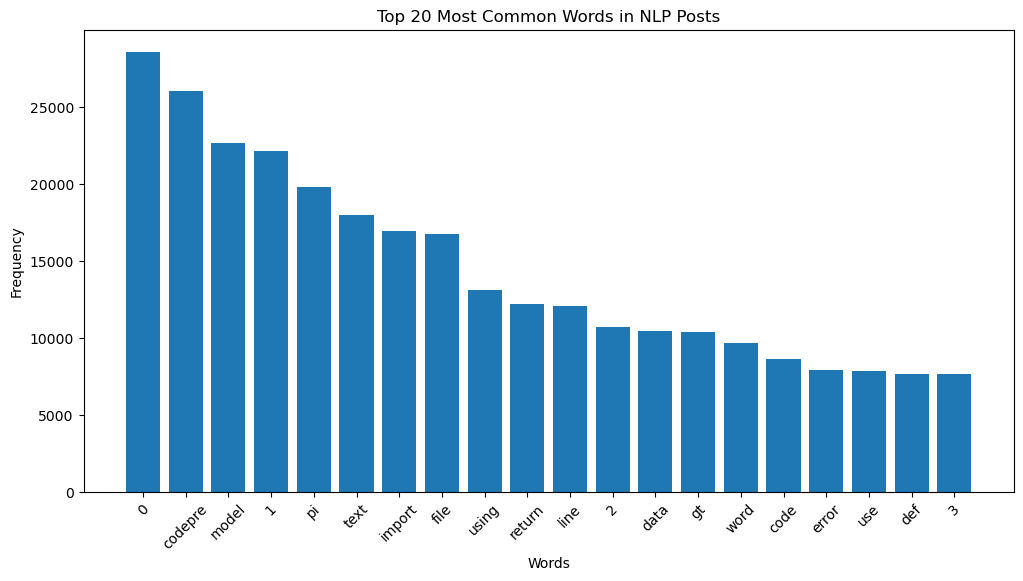

In [5]:
from collections import Counter

# Count word frequencies
word_freq = Counter(" ".join(df["cleaned_text"]).split())
common_words = word_freq.most_common(20)

# Create bar chart
words, counts = zip(*common_words)
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Top 20 Most Common Words in NLP Posts")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()


In [6]:
# Define categories and associated keywords
category_keywords = {
    "transformers": ["transformer", "bert", "gpt", "roberta", "llm"],
    "tokenization": ["token", "tokenization", "split", "wordpiece"],
    "embedding": ["embedding", "word2vec", "glove", "fasttext"],
    "text classification": ["classify", "classification", "label", "sentiment"],
    "text generation": ["generate", "generation", "gpt", "completion"],
    "language modeling": ["language model", "lm", "perplexity"],
    "ner": ["ner", "named entity", "spacy", "entities"],
    "translation": ["translate", "translation"],
    "question answering": ["qa", "question", "answer", "squad"]
}


In [7]:
def categorize_title(title):
    title = title.lower()
    for category, keywords in category_keywords.items():
        if any(keyword in title for keyword in keywords):
            return category
    return "other"


In [8]:
df["category"] = df["title"].apply(categorize_title)


In [9]:
df["category"].value_counts()


category
other                  8552
tokenization           2034
ner                    1835
transformers           1833
text classification    1019
embedding               308
language modeling       191
text generation         135
question answering       71
translation              27
Name: count, dtype: int64

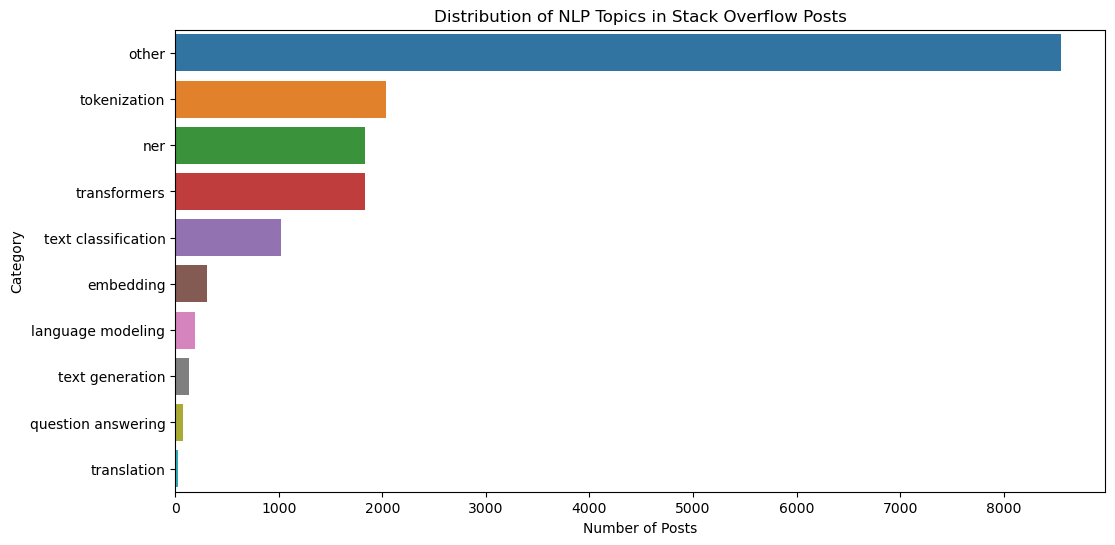

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(y="category", data=df, order=df["category"].value_counts().index)
plt.title("Distribution of NLP Topics in Stack Overflow Posts")
plt.xlabel("Number of Posts")
plt.ylabel("Category")
plt.savefig("category_distribution.png")
plt.show()


In [11]:
# Save only the necessary columns
df[["question_id", "title", "body", "tags", "cleaned_text", "category"]].to_csv("stackoverflow_nlp_cleaned.csv", index=False)

print("Cleaned and categorized data saved to 'stackoverflow_nlp_cleaned.csv'")


Cleaned and categorized data saved to 'stackoverflow_nlp_cleaned.csv'


In [12]:
for cat in df["category"].unique():
    print(f"\n=== Sample posts from category: {cat} ===")
    print(df[df["category"] == cat]["title"].head(3).to_string(index=False))



=== Sample posts from category: other ===
               Natural language processing - Tamil
NameError: name &#39;init_empty_weights&#39; is...
How should I approach the word synonyms for rev...

=== Sample posts from category: ner ===
Sentencepiece not generating models after prepr...
Why does Presidio with spacy nlp engine not rec...
SFTTrainer Error : prepare_model_for_kbit_train...

=== Sample posts from category: embedding ===
No attention output in jinaai/jina-embeddings-v...
Underfitting Pre-Trained Glove + LSTM Model: Ac...
Why is there a gap between the rotary embedding...

=== Sample posts from category: transformers ===
GPT-2 and other models from huggingface -100 la...
How to Identify Similar Code Parts Using CodeBE...
Calculate the gradient with respect to attentio...

=== Sample posts from category: tokenization ===
            Unable to get the tokenizer of Gemma-3
How do I remove escape characters from output o...
How to pass AzureOpenAIEmbeddings in CrewAI, I ...

===

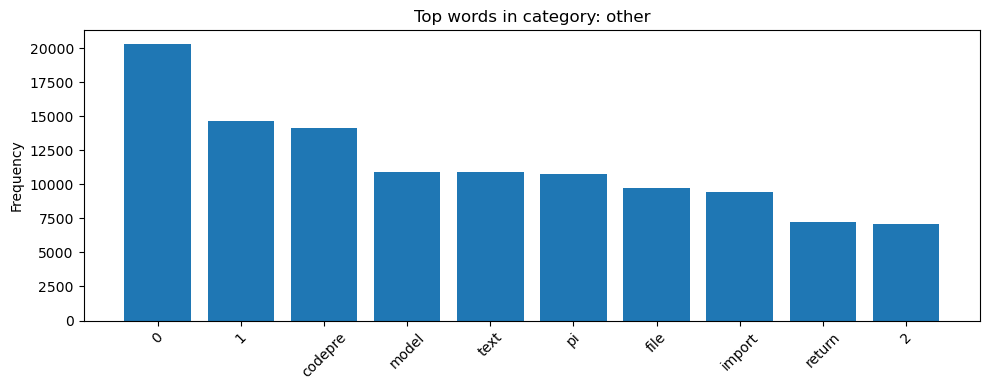

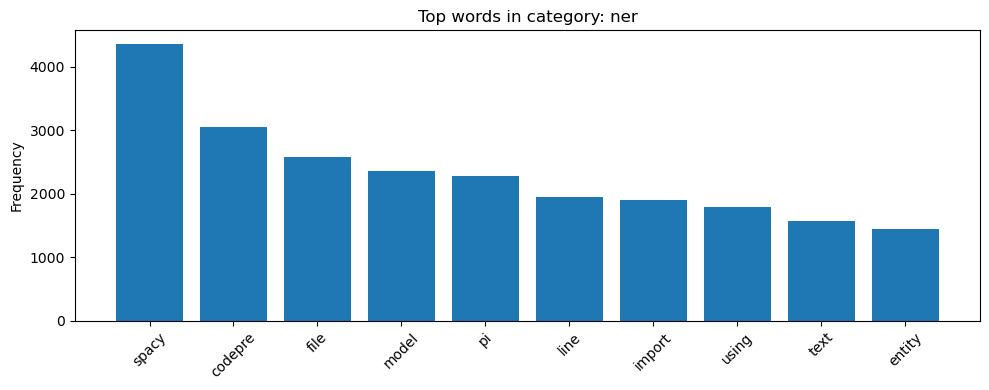

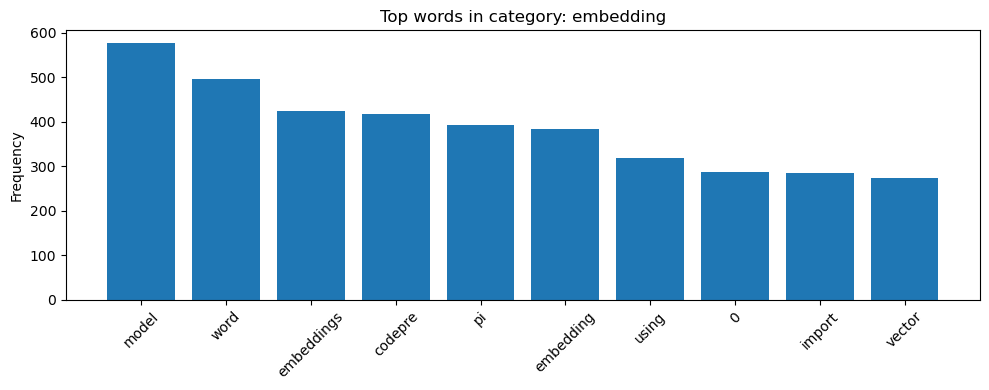

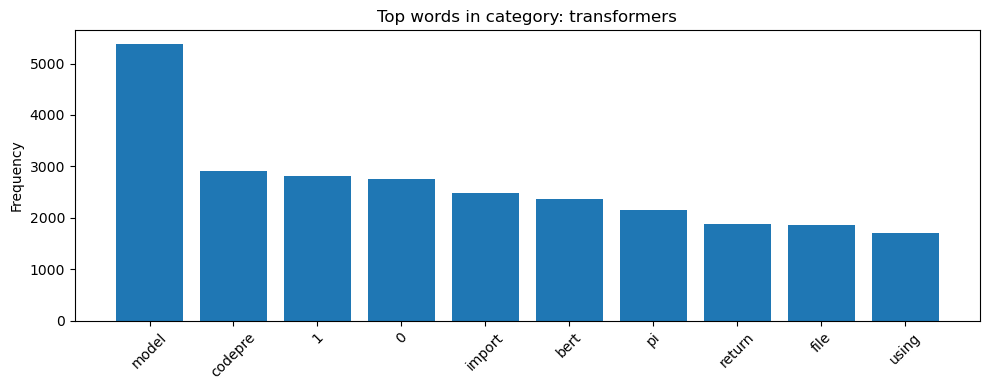

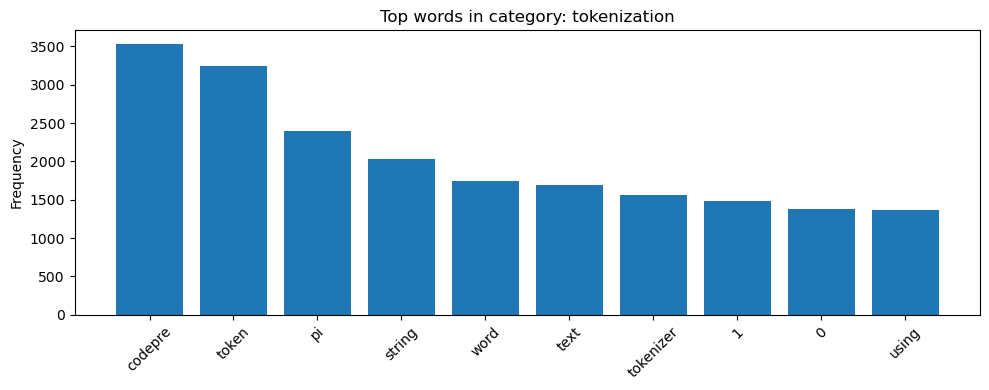

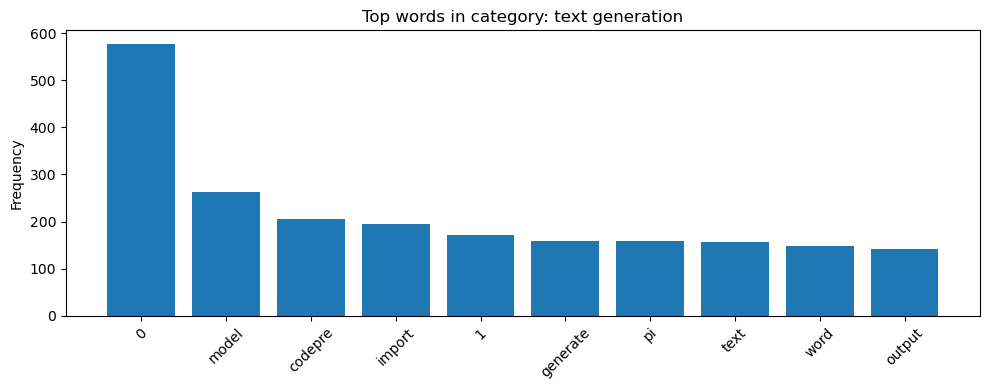

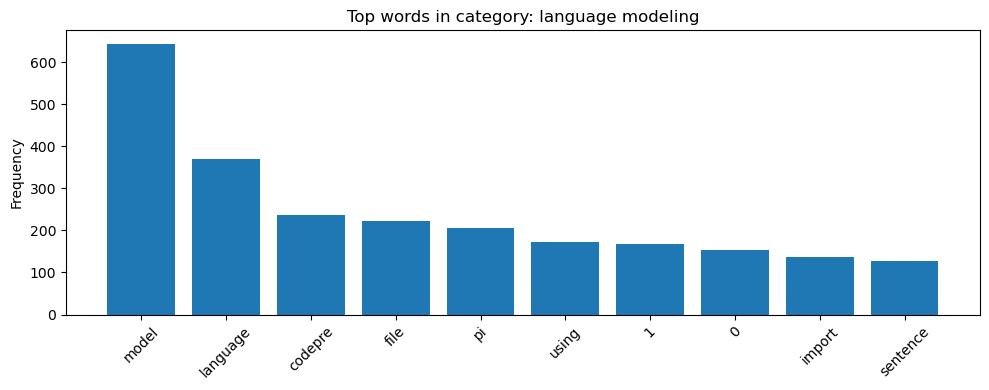

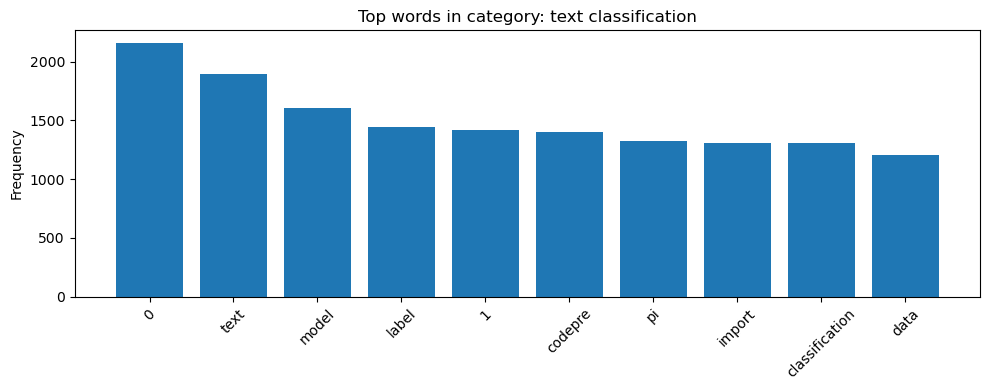

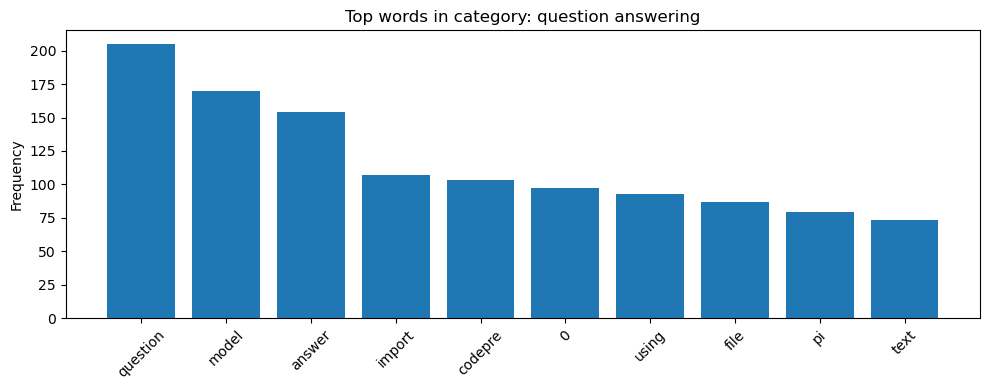

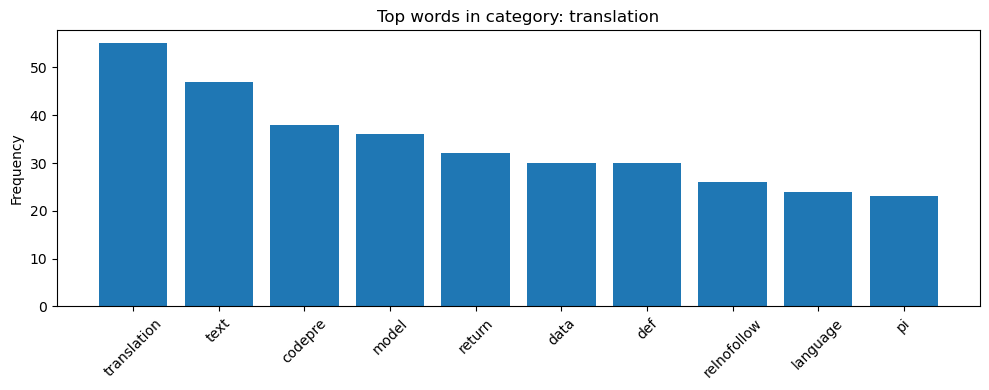

In [13]:
from collections import Counter
import matplotlib.pyplot as plt

# Function to get top N words in a category
def get_top_words(category, n=10):
    words = " ".join(df[df["category"] == category]["cleaned_text"]).split()
    return Counter(words).most_common(n)

# Get unique categories
categories = df["category"].unique()

# Plot top words for each category
for cat in categories:
    top_words = get_top_words(cat)
    words, counts = zip(*top_words)

    plt.figure(figsize=(10, 4))
    plt.bar(words, counts)
    plt.title(f"Top words in category: {cat}")
    plt.xticks(rotation=45)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 1. Split the data
X = df["cleaned_text"]
y = df["category"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 3. Train Logistic Regression
clf = LogisticRegression(max_iter=200)
clf.fit(X_train_tfidf, y_train)

# 4. Predict and evaluate
y_pred = clf.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.732583567635114

Classification Report:
                      precision    recall  f1-score   support

          embedding       0.65      0.31      0.42        70
  language modeling       1.00      0.09      0.17        43
                ner       0.75      0.67      0.71       379
              other       0.72      0.92      0.81      1679
 question answering       0.75      0.21      0.33        14
text classification       0.61      0.40      0.49       174
    text generation       1.00      0.06      0.11        18
       tokenization       0.81      0.54      0.65       433
       transformers       0.74      0.56      0.64       389
        translation       0.00      0.00      0.00         2

           accuracy                           0.73      3201
          macro avg       0.70      0.38      0.43      3201
       weighted avg       0.74      0.73      0.71      3201



C:\Users\gayat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gayat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gayat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


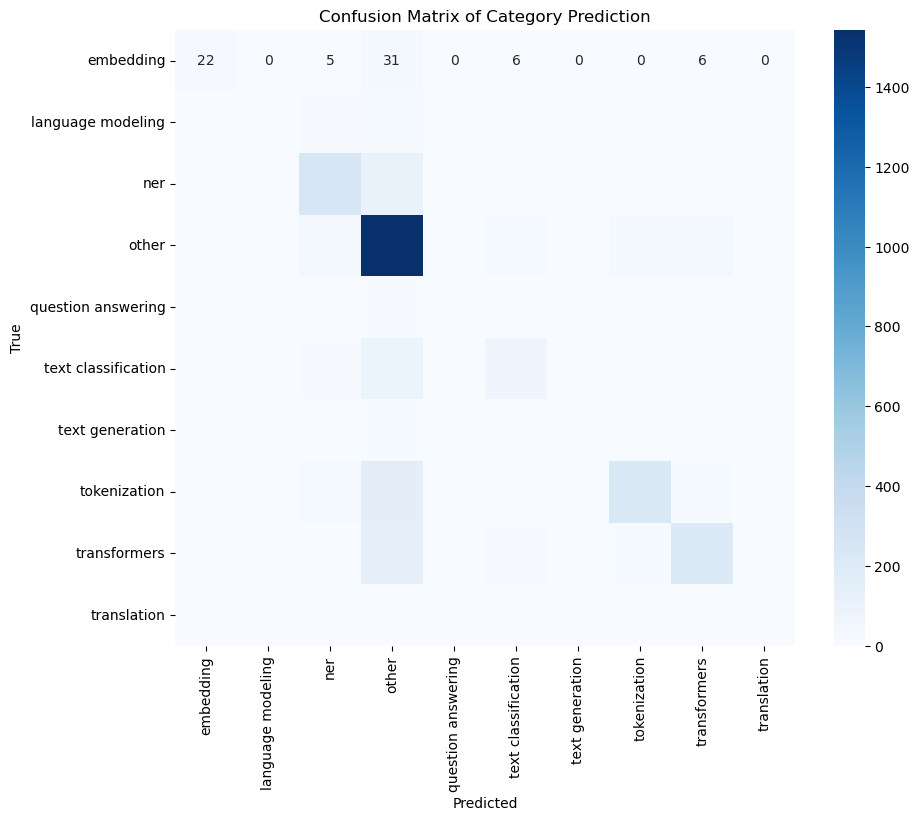

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix of Category Prediction")

plt.show()


In [17]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon
nltk.download("vader_lexicon")

# Initialize VADER
sid = SentimentIntensityAnalyzer()

# Apply VADER to each post's title + body
df["vader_score"] = df["combined_text"].apply(lambda x: sid.polarity_scores(x)["compound"])

# Classify into sentiment labels
def classify_sentiment(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

df["vader_sentiment"] = df["vader_score"].apply(classify_sentiment)

# Display counts
df["vader_sentiment"].value_counts()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gayat\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


vader_sentiment
positive    10448
negative     4729
neutral       828
Name: count, dtype: int64

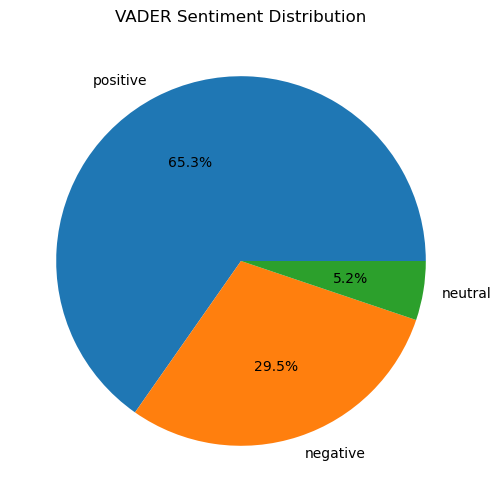

In [18]:
df["vader_sentiment"].value_counts().plot.pie(autopct="%1.1f%%", figsize=(6, 6), title="VADER Sentiment Distribution")
plt.ylabel("")  # Hide y-axis label
plt.show()


In [19]:
from sklearn.preprocessing import LabelEncoder

# Encode sentiment into numerical labels
le = LabelEncoder()
df["sentiment_label"] = le.fit_transform(df["vader_sentiment"])  # e.g., 'positive' -> 2

# Just to confirm mapping
label_map = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Encoding Mapping:", label_map)



Label Encoding Mapping: {'negative': 0, 'neutral': 1, 'positive': 2}


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df["cleaned_text"])
y = df["sentiment_label"]


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Classification Report:
               precision    recall  f1-score   support

    negative       0.75      0.54      0.63       981
     neutral       0.67      0.01      0.02       160
    positive       0.76      0.93      0.84      2060

    accuracy                           0.76      3201
   macro avg       0.73      0.49      0.50      3201
weighted avg       0.76      0.76      0.73      3201



In [22]:
# Predict sentiment for all rows
df["ml_sentiment"] = le.inverse_transform(clf.predict(X))


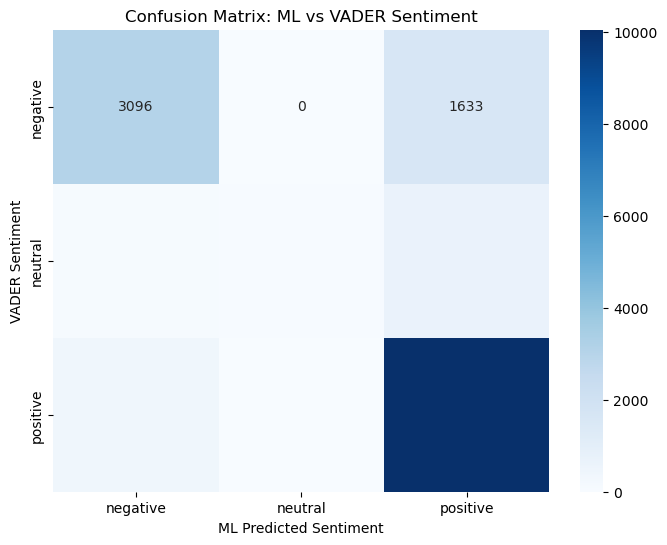

Classification Report (ML vs VADER):

              precision    recall  f1-score   support

    negative       0.86      0.65      0.74      4729
     neutral       0.98      0.06      0.11       828
    positive       0.81      0.96      0.88     10448

    accuracy                           0.82     16005
   macro avg       0.88      0.56      0.58     16005
weighted avg       0.84      0.82      0.80     16005



<Figure size 640x480 with 0 Axes>

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Filter valid sentiment rows
comparison_df = df[["vader_sentiment", "ml_sentiment"]].dropna()

# Generate confusion matrix
cm = confusion_matrix(comparison_df["vader_sentiment"], comparison_df["ml_sentiment"], labels=le.classes_)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("ML Predicted Sentiment")
plt.ylabel("VADER Sentiment")
plt.title("Confusion Matrix: ML vs VADER Sentiment")
plt.show()

# Print classification report
print("Classification Report (ML vs VADER):\n")
print(classification_report(comparison_df["vader_sentiment"], comparison_df["ml_sentiment"]))

plt.savefig("confusion_matrix.png")

In [24]:
def combine_sentiments(vader, ml):
    if vader == ml:
        return vader
    else:
        return ml  # trust ML when there's disagreement

# Apply the ensemble
df["ensemble_sentiment"] = df.apply(lambda row: combine_sentiments(row["vader_sentiment"], row["ml_sentiment"]), axis=1)


In [25]:
# Check agreement rate
agreement_rate = (df["vader_sentiment"] == df["ml_sentiment"]).mean()
ensemble_distribution = df["ensemble_sentiment"].value_counts(normalize=True)

print(f"VADER & ML Agreement Rate: {agreement_rate:.2%}")
print("\nEnsemble Sentiment Distribution:")
print(ensemble_distribution)


VADER & ML Agreement Rate: 82.40%

Ensemble Sentiment Distribution:
ensemble_sentiment
positive    0.771884
negative    0.225117
neutral     0.002999
Name: proportion, dtype: float64


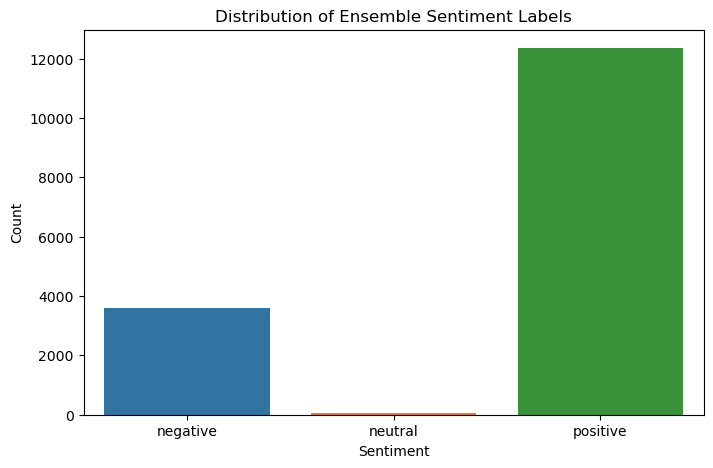

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="ensemble_sentiment", order=le.classes_)
plt.title("Distribution of Ensemble Sentiment Labels")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.savefig("sentiment_distribution1.png")
plt.show()


In [28]:
# Save to CSV
df.to_csv("stackoverflow_nlp_sentiment_final.csv", index=False)
print("✅ Final data with sentiments saved to 'stackoverflow_nlp_sentiment_final.csv'")


✅ Final data with sentiments saved to 'stackoverflow_nlp_sentiment_final.csv'


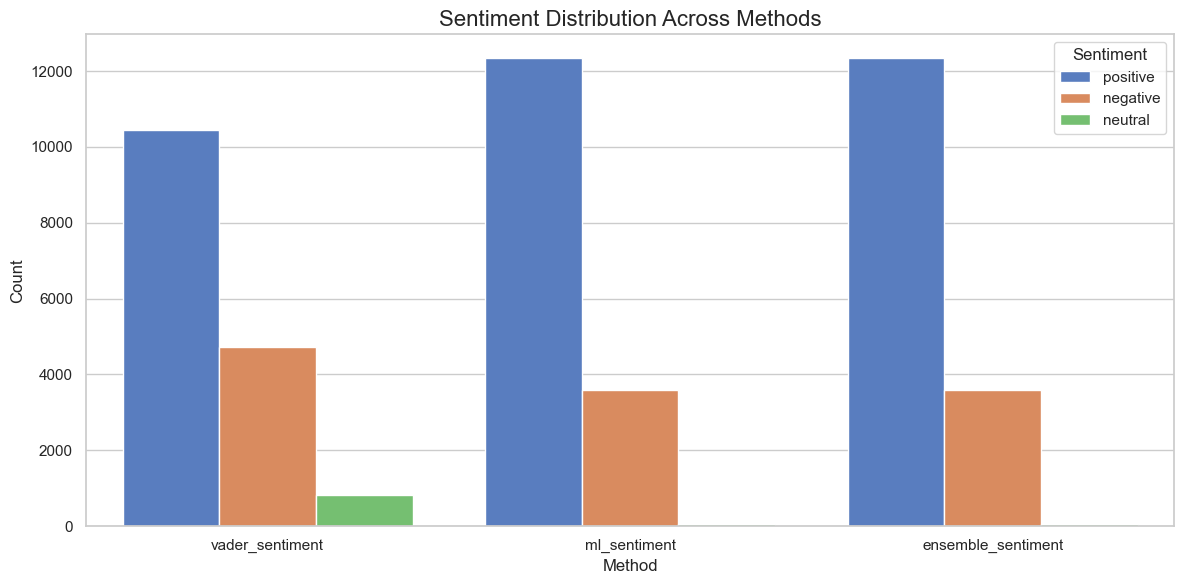

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot sentiment counts
sentiment_counts = df[["vader_sentiment", "ml_sentiment", "ensemble_sentiment"]].melt()
sentiment_counts.columns = ["Method", "Sentiment"]

sns.countplot(data=sentiment_counts, x="Method", hue="Sentiment", palette="muted")

plt.title("Sentiment Distribution Across Methods", fontsize=16)
plt.xlabel("Method", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()


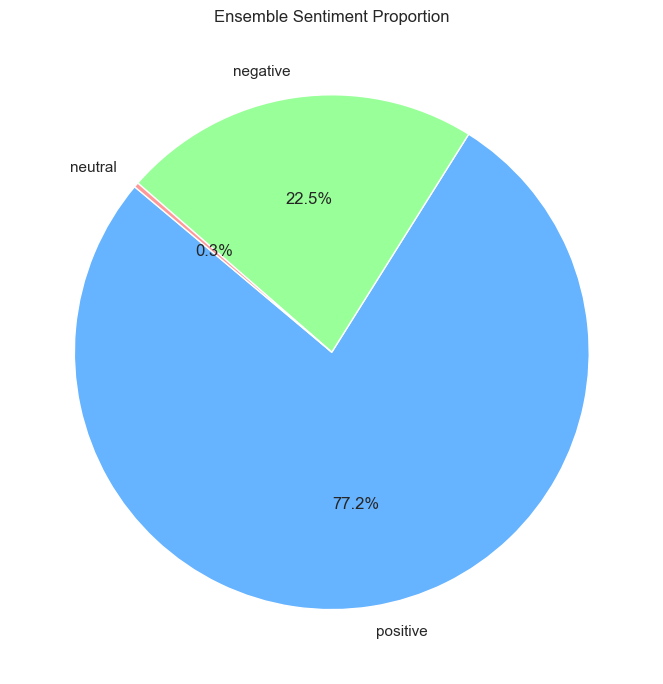

In [30]:
plt.figure(figsize=(7, 7))
df["ensemble_sentiment"].value_counts().plot.pie(
    autopct="%1.1f%%", startangle=140, colors=["#66b3ff", "#99ff99", "#ff9999"]
)
plt.title("Ensemble Sentiment Proportion")
plt.ylabel("")  # Hide y-label
plt.tight_layout()
plt.show()


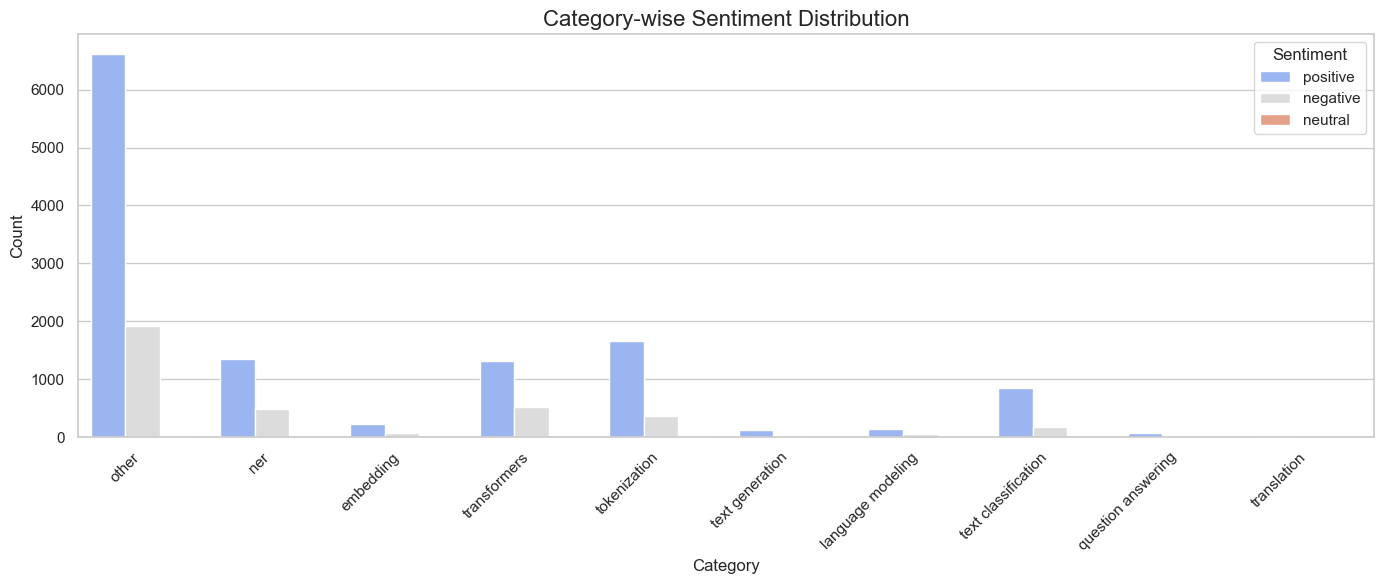

In [31]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x="category", hue="ensemble_sentiment", palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.title("Category-wise Sentiment Distribution", fontsize=16)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()
